In [1]:
import pyodbc
import pandas as pd
import seaborn as sns

server = "localhost,5432"
db_name = "ModMon"
driver = "/usr/local/lib/psqlodbcw.so"

cnxn = pyodbc.connect("DRIVER={" + driver + "};SERVER=" + server + ";DATABASE=" + db_name + ";Trusted_Connection=yes;")
cursor = cnxn.cursor()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
models = pd.read_sql('SELECT models.modelID, models.name, models.teamName, models.description, researchQuestions.description AS question FROM models, researchQuestions WHERE models.questionID=researchQuestions.questionID;', cnxn)
models

,modelid,name,teamname,description,question
0,1,synpuf_stats,REG,"Not really a model, descriptive stats",Descriptive stats for Synpuf database


Visualisation ideas
==

In [3]:
results = pd.read_sql('SELECT * FROM results;', cnxn)
results.head()

,modelid,modelversion,testdatasetid,isreferenceresult,runtime,runid,metric,value,valueerror,resultmessage
0,1,0.0.1,2,1,2020-01-01,1,jan_births,23.0,None,None
1,1,0.0.1,2,1,2020-01-01,1,aug_births,13.0,None,None
2,1,0.0.1,2,1,2020-01-01,1,born_60,1.0,None,None
3,1,0.0.1,2,1,2020-01-01,1,population_size,200.0,None,None
4,1,0.0.1,2,1,2020-01-01,1,mortality,5.0,None,None


## View a particular metric for a model across time and for different versions

In [25]:
metric = 'mortality'
model = 1
query = """
SELECT r.metric, r.value, r.modelversion, d.databasename
FROM results AS r, datasets AS d
WHERE modelID={}
AND r.testdatasetid = d.datasetid
AND metric='{}';
""".format(model, metric)
plot3_results = pd.read_sql(query, cnxn)
plot3_results

,metric,value,modelversion,databasename
0,mortality,5.00,0.0.1,WEEK_01
1,mortality,5.00,0.0.1,WEEK_01
2,mortality,5.00,0.0.1,WEEK_02
3,mortality,4.75,0.0.1,WEEK_03
4,mortality,4.80,0.0.1,WEEK_04
5,mortality,5.00,0.0.1,WEEK_05
6,mortality,5.00,0.0.1,WEEK_06
7,mortality,5.00,0.0.1,WEEK_07
8,mortality,5.00,0.0.1,WEEK_08
9,mortality,5.00,0.0.1,WEEK_09


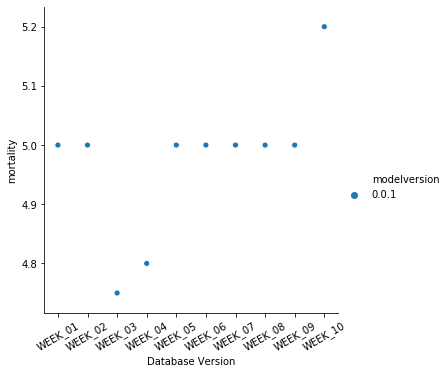

In [26]:
chart = sns.relplot(x='databasename', y='value', hue='modelversion', data=plot3_results)
chart.set_xticklabels(rotation=30)
chart.set(xlabel='Database Version', ylabel=metric)
chart